In [5]:
import tensorflow as tf
import os

In [82]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Data Loading

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [85]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 166 files belonging to 2 classes.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [87]:
batch_size = 32
image_size = (128, 128)

In [88]:
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Assuming you have two classes: happy and sad
    subset='training'
)

valid_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 134 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [89]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 neuron for binary classification
])


In [90]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [91]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)


Epoch 1/10
5/5 [==============================] - 13s 2s/step - loss: 1.2830 - accuracy: 0.3955 - val_loss: 0.6720 - val_accuracy: 0.6250
Epoch 2/10
5/5 [==============================] - 9s 2s/step - loss: 0.5730 - accuracy: 0.7463 - val_loss: 0.7059 - val_accuracy: 0.6250
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 0.5021 - accuracy: 0.7239 - val_loss: 0.7152 - val_accuracy: 0.5938
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 0.3767 - accuracy: 0.8731 - val_loss: 0.6524 - val_accuracy: 0.5938
Epoch 5/10
5/5 [==============================] - 9s 2s/step - loss: 0.2787 - accuracy: 0.9478 - val_loss: 0.7076 - val_accuracy: 0.7500
Epoch 6/10
5/5 [==============================] - 9s 2s/step - loss: 0.2224 - accuracy: 0.9328 - val_loss: 0.5775 - val_accuracy: 0.7188
Epoch 7/10
5/5 [==============================] - 6s 1s/step - loss: 0.1333 - accuracy: 0.9627 - val_loss: 0.7166 - val_accuracy: 0.7188
Epoch 8/10
5/5 [========================

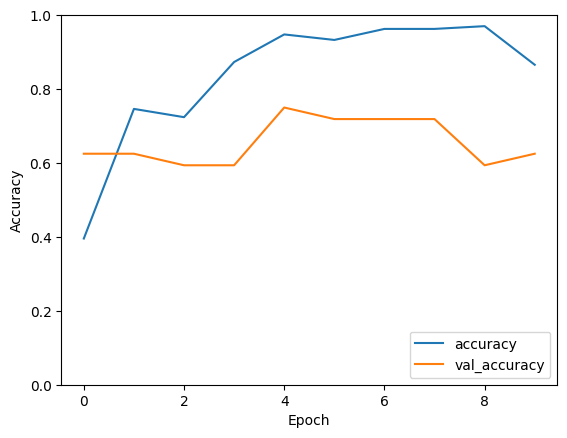

In [92]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [93]:
model.save('happysad.h5')


In [ ]:
from tensorflow.keras.models import load_model
import matplotlib.image as mpimg
loaded_model = load_model('happysad.h5')
test_image_path = 'test.png'
test_image = tf.keras.utils.load_img(test_image_path, target_size=(128, 128))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = test_image.reshape(1, 128, 128, 3)
predictions = loaded_model.predict(test_image)
img = mpimg.imread(test_image_path)
plt.imshow(img)
plt.axis('off')  
plt.title("Happy" if predictions[0] > 0.5 else "Sad") 
plt.show()